# Assignment - A1
## Due: Mon. 02/07 @ 11:59pm
## Tyler Birnie, Devin Hall

Some pre-requisites we will need for the project

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math as m

## (Question 1) Data Preprocessing Function Definitions

In [4]:
def minmaxNorm(trData, teData, minV=0, maxV=1):

    training_data = np.asarray(trData, dtype=float)

    # Find the local min and max
    tr_max = training_data.max()
    tr_min = training_data.min()

    # Make the data start at 0
    training_data -= tr_min
    if teData:
        teData -= tr_min

    # Make all the data go from 0 to 1
    training_data /= tr_max - tr_min
    if teData:
        teData /= tr_max - tr_min

    # Make all the data go from 0 to maxV-minV
    training_data *= maxV - minV
    if teData:
        teData *= maxV - minV

    # Shift all the data so the min is minV
    training_data += minV
    if teData:
        teData += minV

    return training_data

In [5]:

#in_ls = np.array([1,2,3,4,5])          #test case1
#in_ls=np.array([6,7,8,9,10])            #test case2
#in_ls = np.array( [[1,2,3],[6,7,8]] )  #test case3
    
def zscoreNorm(trData, teData, madFlag=False):
    pass
    
    trData=np.asarray(trData)
    
    
    #print("mean is:", trData.mean() )     #just for debugg
    #print("variance is:", trData.var() )  #just for debugg
   
    #check if flag is set
    if(madFlag == True):
        mu = abs(trData.mean())
            
    else:
        mu = sum(trData) / len(trData)
    
    sigma2 = 0
    
    #loop through to find the toatl sum of sigma^2
    for x in trData:
           sigma2 += pow((x - mu),2)
    
    
    #calculate actual value of S.D by taking the squareroot of sigma^2
    sigma = m.sqrt(sigma2 / len(trData))
    
        
    rt_ls=[] # create blank arr to store values
    
    #loop through to find zscore, add to array list
    for val in trData:
        temp = ((val - mu) / sigma)
       
        rt_ls.append(temp)
 
        #print(temp)     #just for debugging

    #add array list values to data frame
    df = pd.DataFrame(rt_ls, columns = ['zscoreNorm'])
    
    
    return df                       # new data frame but normalized using zscore


#zscoreNorm(in_ls,None,False)   #just for testing function call with input

## (Question 2) Data Preprocessing Reporting

### (a) Using Our Functions

In [6]:
DATA = [20, 37, 40, 60, 85, 120]  # Define the data we are going to use

# Using our functions from Q1

In [7]:
minmaxNorm(DATA, None, minV=0, maxV=1)

array([0.  , 0.17, 0.2 , 0.4 , 0.65, 1.  ])

In [8]:
minmaxNorm(DATA, None, minV=-1, maxV=1)

array([-1.  , -0.66, -0.6 , -0.2 ,  0.3 ,  1.  ])

In [9]:
zscoreNorm(DATA, None, False)

,zscoreNorm
0,-1.202211
1,-0.695494
2,-0.606073
3,-0.009936
4,0.735236
5,1.778477


### (b) Using built-ins

In [10]:
dataframe = pd.DataFrame(DATA)
dataframe = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
print(dataframe)

      0
0  0.00
1  0.17
2  0.20
3  0.40
4  0.65
5  1.00


In [11]:
dataframe = pd.DataFrame(DATA)
dataframe = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
dataframe *= 1-(-1)
dataframe += -1

print(dataframe)

      0
0 -1.00
1 -0.66
2 -0.60
3 -0.20
4  0.30
5  1.00


In [12]:
dataframe = pd.DataFrame(DATA)
dataframe.apply(scipy.stats.zscore)

,0
0,-1.202211
1,-0.695494
2,-0.606073
3,-0.009936
4,0.735236
5,1.778477


## (Question 3) Example Training Data

In [13]:
# Define the training data we are going to use
Q3_TRAINING_DATA = [
    [1.4, 1.3, 2.9],
    [1.8, 1.1, 3.2],
    [1.3, 1.2, 2.9],
    [0.9, 3.3, 3.1],
    [1.5, 2.1, 3.3]
]

NEW_POINT = [1.25, 1.74, 3.01]
print(Q3_TRAINING_DATA)

[[1.4, 1.3, 2.9], [1.8, 1.1, 3.2], [1.3, 1.2, 2.9], [0.9, 3.3, 3.1], [1.5, 2.1, 3.3]]


### (a) Calculate distances

In [14]:
#print("this line should print the distance between new data point and every other point using manhattan distance")

# Python Manhattan distance using scipy import
from scipy.spatial.distance import cityblock

arr=[]
arr2=[]
arr3=[]       

#loop through training_data and new_points for evaulation using the manhattan distance
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = cityblock(i,j)
        arr.append(temp)
    arr2=np.array(arr)
    
arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])
print("manhattan distance\n")
print(df)


manhattan distance

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0            1.85            1.94            3.43
1            2.65            2.16            3.31
2            1.75            2.14            3.63
3            4.25            3.76            2.49
4            3.15            2.16            2.71


In [15]:
#print("this line should print the distance between new data point and every other point using euclidean distance")

# Python Euclidian distance using scipy import
from scipy.spatial import distance

arr=[]
arr2=[]
arr3=[]       

#loop through training data and new_points for evaulation using the euclidean distance 
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = distance.euclidean(i,j)
        arr.append(temp)
    arr2=np.array(arr)
    
arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])
print("euclidean distance\n")
print(df)


euclidean distance

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0        1.657558        1.286390        2.351234
1        2.031625        1.595243        2.268987
2        1.651514        1.353071        2.492449
3        2.783433        2.233562        2.131736
4        2.233271        1.618889        1.786701


In [16]:
#print("this line should print the distance between new data point and every other point using minkowski distance (lambda=3)")
arr=[]    
arr2=[]
arr3=[]       
      
#loop through traning_data and new_points for evaulation with lamda = 3 for minkowski distnace    
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = distance.minkowski(i,j,3)
        arr.append(temp)
    arr2=np.array(arr)

#reformat the shape of the array     
arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])
print("minkoski distance\n")
print(df)


minkoski distance

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0        1.650428        1.190053        2.093466
1        1.964768        1.499925        2.060351
2        1.650031        1.217238        2.219339
3        2.465643        1.904199        2.111879
4        2.098780        1.568240        1.616102


In [17]:
#print("this line should print the distance between new data point and every other point using supremum distance")

arr=[]    
arr2=[]
arr3=[]       
      
#loop through traning_data and new_points for supremum (aka: chebyshev) distance evaulation     
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = distance.chebyshev(i,j)
        arr.append(temp)
    arr2=np.array(arr)

#reformat the shape of the array     
arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])

print("supremum distance\n")
print(df)


supremum distance

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0            1.65            1.16            1.71
1            1.95            1.46            1.91
2            1.65            1.16            1.81
3            2.05            1.56            2.11
4            2.05            1.56            1.51


In [18]:
#print("this line should print the distance between new data point and every other point using cosine similarity")

arr=[]    
arr2=[]
arr3=[]       
      
#loop through traning_data and new_points for cosine distance evaulation     
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = distance.cosine(i,j)
        arr.append(temp)
    arr2=np.array(arr)

#reformat the shape of the array     
arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])

print("cosine distance\n")
print(df)


cosine distance

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0        0.068991        0.068991        0.068991
1        0.081121        0.081121        0.081121
2        0.082238        0.082238        0.082238
3        0.087001        0.087001        0.087001
4        0.049067        0.049067        0.049067


### (b) Normalize and use Euclidean distance

In [19]:
#print("this line should print the distance between new data point and every other point using euclidean distance")

# Python Euclidian distance using scipy import
from scipy.spatial import distance

arr=[]
arr2=[]
arr3=[]

#loop through training data and new_points for evaulation using the euclidean distance
for i in Q3_TRAINING_DATA:
    for j in NEW_POINT:
        temp = distance.euclidean(i,j)
        arr.append(temp)
    arr2=np.array(arr)

arr3=arr2.reshape(5,3)

df=pd.DataFrame(arr3,columns=['Distance: 1.25', 'Distance: 1.74', 'Distance: 3.01'])
minmaxNorm(df, None, 0, 1)
print("euclidean distance normalized from 0 to 1\n")
print(df)


euclidean distance normalized from 0 to 1

   Distance: 1.25  Distance: 1.74  Distance: 3.01
0        0.247934        0.000000        0.711298
1        0.497805        0.206308        0.656358
2        0.243897        0.044541        0.805627
3        1.000000        0.632695        0.564677
4        0.632501        0.222103        0.334199


## (Question 4) Movie Data

In [20]:
# Load data provided in movie.csv file
MOVIE_DATA = 'movies.csv'

# Constant definitions for the movie columns
TITLE = 'Title'  # The title of the movie
TITLE_TYPE = 'Type'  # The type of movie, can be (Documentary, Feature Film)
GENRE = 'Genre'  # The genre of movie, can be (Action & Adventure, Comedy, Documentary, Drama, Horror, Mystery & Suspense, and others)
RUNTIME = 'Runtime (min)'  # The runtime of the movie in minutes
MPAA_RATING = 'Rating'  # The rating of the movie (G, PG, PG-13, R, Unrated)
STUDIO = 'Studio'  # The studio that produced the movie
THTR_REL_YEAR = 'Year Premiered'  # The year that the movie released in theaters
THTR_REL_MONTH = 'Month Premiered'  # The month that the movie released in theaters
THTR_REL_DAY = 'Day Premiered'  # The day that the movie released in theaters
DVD_REL_YEAR = 'Year Released'  # The year that the movie released in dvd
DVD_REL_MONTH = 'Month Released'  # The month that the movie released in dvd
DVD_REL_DAY = 'Day Released'  # The day that the movie released in dvd
IMDB_RATING = 'IMDB Rating'  # The rating on IMDB
IMDB_NUM_VOTES = 'IMDB Votes'  # The number of votes on IMDB
CRITICS_RATING = 'RT Critics Rating'  # The Rotten Tomatoes rating can be (Certified Fresh, Fresh, Rotten)
CRITICS_SCORE = 'RT Critics Score'  # The Rotten Tomatoes rating score from the critics
AUDIENCE_RATING = 'RT Audience Rating'  # The Rotten Tomatoes rating can be (Spilled, Upright)
AUDIENCE_SCORE = 'RT Audience Score'  # The Rotten Tomatoes rating score from the audience
BEST_PIC_NOM = 'Nominated for Best Picture Oscar?'  # Whether or not the movie was nominated for a Best Picture Oscar can be (yes, no)
BEST_PIC_WIN = 'Won Best Picture Oscar?'  # Whether or not the movie was a winner for a Best Picture Oscar can be (yes, no)
BEST_ACTOR_WIN = 'Main Actor ever won an Oscar?'  # Whether or not any of the main actors in the movie ever won an oscar in their career (yes, no)
BEST_ACTRESS_WIN = 'Main Actress ever won an Oscar?'  # Whether or not any of the main actresses in the movie ever won an oscar in their career (yes, no)
BEST_DIRECTOR_WIN = 'Director ever won an Oscar?'  # Whether or not any of the director of the movie ever won an oscar in their career (yes, no)
TOP_200_BOX = 'Top 200?'  # Whether or not the movie was in the top 200 box office list (yes, no)
DIRECTOR = 'Directed By'  # The director of the movie
ACTOR_1 = "First Actor"  # The first main actor/actress of the movie
ACTOR_2 = "Second Actor"  # The second main actor/actress of the movie
ACTOR_3 = "Third Actor"  # The third main actor/actress of the movie
ACTOR_4 = "Fourth Actor"  # The fourth main actor/actress of the movie
ACTOR_5 = "Fifth Actor"  # The fifth main actor/actress of the movie
IMDB_URL = "IMDB Link"  # The imdb link to the page for the movie on imdb
RT_URL = 'Rotten Tomatoes Link'  # The rotten tomatoes link for the page for the movie on rotten tomatoes

MOVIE_ATTRIBUTE_COLUMNS = [
    TITLE,
    TITLE_TYPE,
    GENRE,
    RUNTIME,
    MPAA_RATING,
    STUDIO,
    THTR_REL_YEAR,
    THTR_REL_MONTH,
    THTR_REL_DAY,
    DVD_REL_YEAR,
    DVD_REL_MONTH,
    DVD_REL_DAY,
    IMDB_RATING,
    IMDB_NUM_VOTES,
    CRITICS_RATING,
    CRITICS_SCORE,
    AUDIENCE_RATING,
    AUDIENCE_SCORE,
    BEST_PIC_NOM,
    BEST_PIC_WIN,
    BEST_ACTOR_WIN,
    BEST_ACTRESS_WIN,
    BEST_DIRECTOR_WIN,
    TOP_200_BOX,
    DIRECTOR,
    ACTOR_1,
    ACTOR_2,
    ACTOR_3,
    ACTOR_4,
    ACTOR_5,
    IMDB_URL,
    RT_URL
]

# Read it using pandas
data = pd.read_csv(MOVIE_DATA, names=MOVIE_ATTRIBUTE_COLUMNS)

# The code below can be removed, just test
print("The movie data: ")
data.head(n=len(data))

The movie data: 


,Title,Type,Genre,Runtime (min),Rating,Studio,Year Premiered,Month Premiered,Day Premiered,Year Released,...,Director ever won an Oscar?,Top 200?,Directed By,First Actor,Second Actor,Third Actor,Fourth Actor,Fifth Actor,IMDB Link,Rotten Tomatoes Link
0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
1,Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
2,The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
3,Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
4,The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Death Defying Acts,Feature Film,Drama,97,PG,Genius Productions,2008,7,11,2008,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
643,Half Baked,Feature Film,Comedy,82,R,Universal Pictures,1998,1,16,1998,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
644,Dance of the Dead,Feature Film,Action & Adventure,87,R,Grindhouse Entertainment,2008,3,9,2008,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
645,Around the World in 80 Days,Feature Film,Action & Adventure,120,PG,Buena Vista Pictures,2004,6,16,2004,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


### (a) Any missing data? How are missing values encoded?
- There is missing data in the movies data set. Missing data is denoted by `NA`

In [21]:
#print('this line should print a table that reports column name and the percent of missing data for a column')


def missing_zero_values_table(df):
        mis_val = df.isnull().sum()                                 #number of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)         #percent of missing values
        mz_table = pd.concat([ mis_val, mis_val_percent], axis=1)   #create table
        
        mz_table = mz_table.rename(columns = { 0 : 'Missing Values', 1 : '% of Total Values'})   #name columns
        
        mz_table = mz_table[ mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        return mz_table

missing_zero_values_table(data)



,Missing Values,% of Total Values
Fifth Actor,14,2.2
Fourth Actor,12,1.9
Third Actor,9,1.4
Year Released,8,1.2
Month Released,8,1.2
Day Released,8,1.2
Studio,7,1.1
Second Actor,7,1.1
Directed By,2,0.3
First Actor,2,0.3


### (b) Ignoring missing values in `STUDIO`, `DVD_REL_YEAR`, `DVD_REL_MONTH`, `DVD_REL_DAY`, and anything after `BEST_PIC_NOM`, remove the sample and report the amount of samples remaining

In [22]:
IGNORED_CATS = [STUDIO, DVD_REL_YEAR, DVD_REL_MONTH, DVD_REL_DAY, BEST_PIC_NOM, BEST_PIC_WIN, BEST_ACTOR_WIN,
    BEST_ACTRESS_WIN, BEST_DIRECTOR_WIN, TOP_200_BOX, DIRECTOR, ACTOR_1, ACTOR_2, ACTOR_3, ACTOR_4, ACTOR_5,
    IMDB_URL, RT_URL ]

# Make a copy of the list of all movie attributes
COLUMNS_WANTED = list(MOVIE_ATTRIBUTE_COLUMNS)
# Loop through all the categories we want to ignore and remove it from our list
for c in IGNORED_CATS:
    COLUMNS_WANTED.remove(c)

# Make a set of rows to delete
ROWS_MARKED_FOR_DELETION = set()

# Make a copy of the data but only with the columns we care about
simplified_df = data[COLUMNS_WANTED]

samples_removed = 0

# Find indeces that should be removed, loop through all the rows in the table
for i, movie in simplified_df.iterrows():
    if any(movie.isnull()):
        ROWS_MARKED_FOR_DELETION.add(i)

for ind in sorted(ROWS_MARKED_FOR_DELETION, reverse=True):
    data = data.drop(index=ind)
    samples_removed += 1


print(f"After removing {samples_removed} samples, {len(data)} remain.")

After removing 1 samples, 646 remain.


### (c) Report all variable (column) types, if nominal or ordinal: size of their domain (possible values), if numeric: the min and max possible value for the following variables
- `GENRE`: Nominal, domain size: 7
- `RUNTIME`: Numeric, possible values: 0 -> +infinity
- `MPAA_RATING`: Ordinal, domain size: 5
- `STUDIO`: Nominal, domain size: infinite
- `THTR_REL_MONTH`: Numeric, possible values: 1 -> 12
- `IMDB_RATING`: Numeric, possible values: 0 -> 10
- `AUDIENCE_SCORE`: Numeric, possible values: 0 -> 100
- `BEST_PIC_WIN`: Ordinal, domain size: 2

### (d) Summary Statistics
- Report a five number summary in a table for `CRITICS_SCORE` and `RUNTIME`

In [23]:
#preprocessing function: take a list, removes the columns names and returns an array
def arrClean(input):
    sorted_in=[]   #array to hold values

    count=0        #counter variable

    #loop to remove any column tags
    for x in arr_in:
        if count > 0:
            sorted_in.append(x)
        count = count +1

    # using list comprehension to perform conversion of str to int
    crit_list = [int(i) for i in sorted_in]

    return np.asarray(crit_list)


In [24]:
from numpy import percentile

# calculate a 5-number summary
def fiveNumSum(in_arr):  
        
    # calculate quartiles
    quartiles = percentile(in_arr, [25, 50, 75])

    # calculate min/max
    data_min, data_max = in_arr.min(), in_arr.max()

    # print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1:  %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3:  %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)
    
    return


In [25]:
arr_in = data['RT Critics Score']    #import specific column from data

temp = arrClean(arr_in) #clean up data before finding the five number sum

#function call to print 5 number summary for Critics Score

print("Five Number summary for Critics Score")

fiveNumSum(temp)


Five Number summary for Critics Score
Min: 1.000
Q1:  33.000
Median: 61.000
Q3:  83.000
Max: 100.000


In [26]:
arg_in = data['Runtime (min)']    #import specific column from data
#print(arg_in)

temp2 = arrClean(arg_in) #clean up data before finding the five number sum

#function call to print 5 number summary for Critics Score

print("The Five Number summary for Runtime")

fiveNumSum(temp2)

The Five Number summary for Runtime
Min: 1.000
Q1:  33.000
Median: 61.000
Q3:  83.000
Max: 100.000


- Report the mean, median, and mode of `AUDIENCE_SCORE` and `IMDB_RATING`

In [27]:
#print('this line prints the mean, median, and mode of the variables above')
from scipy import stats

#'RT Audience Score'
argv_in =data['RT Audience Score']
temp3 =arrClean(argv_in)

print("Audience Score")
print('Mean: %.3f' % np.mean(temp3))
print('Median:  %.3f' % np.median(temp3))
print('Mode: %.3f' % stats.mode(temp3)[0])



Audience Score
Mean: 57.634
Median:  61.000
Mode: 67.000


In [28]:
#'IMDB Rating'
arg = data['IMDB Rating']
temp4 = arrClean(arg)

print("IMDB Rating")
print('Mean: %.3f' % np.mean(temp4))
print('Median:  %.3f' % np.median(temp4))
print('Mode: %.3f' % stats.mode(temp4)[0])
 

IMDB Rating
Mean: 57.634
Median:  61.000
Mode: 67.000


- Report the first quartile, 31st percentile, third quartile, and 90th  percentile for `AUDIENCE_SCORE` and `IMDB_RATING`

In [29]:
foo =data['RT Audience Score']
temp5= arrClean(foo)

# calculate quartiles
quartiles = percentile(temp5, [25, 31, 75, 90])

print("Audience Score")
print('Q1: %.3f' % quartiles[0])
print('31st:  %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('90th:  %.3f' % quartiles[3])


Audience Score
Q1: 33.000
31st:  40.000
Q3: 83.000
90th:  93.000


In [30]:
foo2 =data['IMDB Rating']
temp6= arrClean(foo2)

# calculate quartiles
quartiles = percentile(temp6, [25, 31, 75, 90])

print("IMDB Rating")
print('Q1: %.3f' % quartiles[0])
print('31st:  %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('90th:  %.3f' % quartiles[3])
    

IMDB Rating
Q1: 33.000
31st:  40.000
Q3: 83.000
90th:  93.000


### (e) Visualizations
- Vertical bar plot for genre, sorted in decreasing order

<AxesSubplot:>

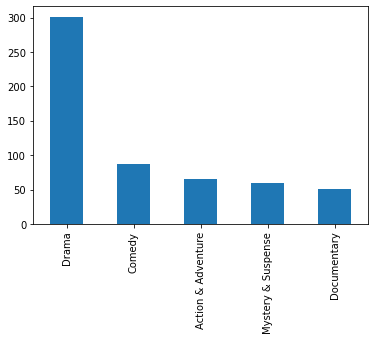

In [31]:
# Top 5 genres
data[GENRE].value_counts()[:5].plot.bar()

As we can see, the top 5 genres are *Drama, Comedy, Action & Adventure, Mystery and Suspense, and Documentaries.*

- Horizontal bar plot for `MPAA_RATING`, sorted by `RATING`

<AxesSubplot:>

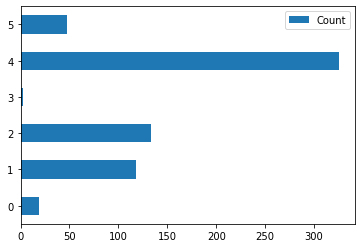

In [32]:
dict_repr = dict(zip(data[MPAA_RATING].value_counts().keys(), data[MPAA_RATING].value_counts().values))
y = ['G', 'PG', 'PG-13', 'NC-17', 'R', 'Unrated']
x = [dict_repr[rating] for rating in y]

pd.DataFrame({'Count':x, 'Rating':y}).plot.barh()

- Histogram of `AUDIENCE_SCORE`, select appropriate number of bins to visualize the distribution

<AxesSubplot:>

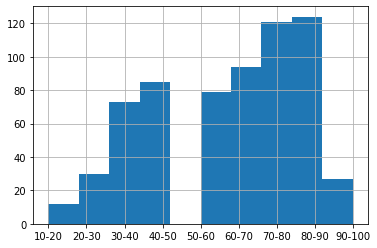

In [33]:
col = data[AUDIENCE_SCORE][1:]
col = col.sort_values()
col = col.astype(int)
col = pd.cut(
    col,
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'],
    ordered=True

)
col.hist()

- Density plot of `RUNTIME`

<AxesSubplot:ylabel='Density'>

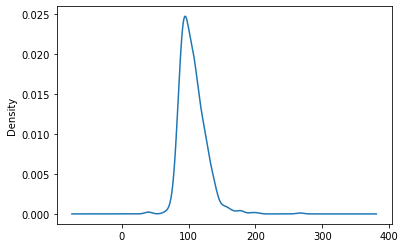

In [34]:
col = data[RUNTIME][1:]
col = col.astype(float)
col.plot.density()

- Stacked bar plot to show the proportion of movies for `CRITICS_RATING`

<AxesSubplot:>

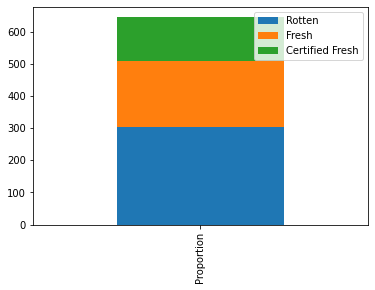

In [35]:
col = data[CRITICS_RATING][1:].value_counts()
ind = ['Proportion']
new = pd.DataFrame(
    {
        'Rotten': col['Rotten'],
        'Fresh': col['Fresh'],
        'Certified Fresh': col['Certified Fresh'],
    }, index=ind
).head(1)
new.plot.bar(stacked=True)

- Bar chart for `CRITICS_RATING`

<AxesSubplot:>

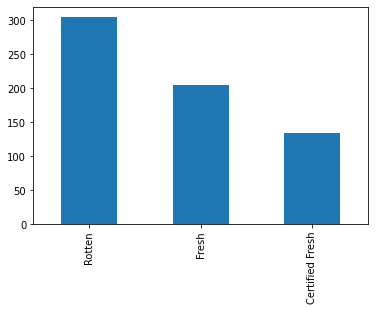

In [36]:
col = data[CRITICS_RATING][1:].value_counts()
col.plot.bar()

### (f) Multi-variable Visualization
- Vertical grouped bar plot for `GENRE` with `AUDIENCE_RATING`, showing only top 5 genres

<AxesSubplot:>

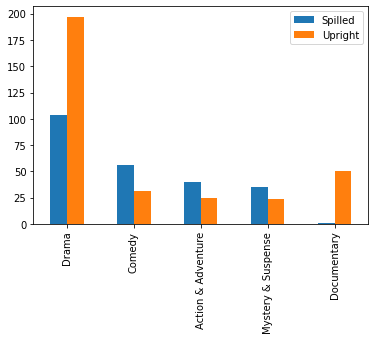

In [37]:
# Make a copy of the master data, but only look at the GENRE and AUDIENCE_RATING columns
new = data[[GENRE, AUDIENCE_RATING]].copy()
# The first row is just the titles of the columns and is considered garbage, use list splicing
# To construct a table that contains every value except the first row
new = data[1:]

# Index the GENRE column, then return a list of the top 5 rows
g = new[GENRE].value_counts()[:5]

# Returns the list of genres that are in the top 5 from before
genre_keys = g.keys()

# Make a dict based on the keys we care about, this dict is structured like this:
# Every genre keeps track of counts for spilled and upright
# genre_counts = {
#       'Drama': {'Spilled': 0, 'Upright': 0},
#       'Comedy': {'Spilled': 0, 'Upright': 0},
#       'Documentary': {'Spilled': 0, 'Upright': 0}
# }
genre_counts = {gen: {'Spilled': 0, 'Upright': 0} for gen in genre_keys}

# Now loop through all the movies on file
for i, movie in new.iterrows():
    mov_genre = movie[GENRE]
    mov_rating = movie[AUDIENCE_RATING]

    # Add to the count if it exists in the dict
    if mov_genre in genre_counts:
        genre_counts[mov_genre][mov_rating] += 1

# Now we construct arrays we want to plot on the bar chart,
# Each group of bars is one genre, and each genre is going to have a 'spilled' count and a 'upright' count
# Define the index labels at the bottom, these are just our top 5 genres in order

# Estimates based on the graph, used for documentation purposes
# In our example, Drama        has 100 Spilled movies, and 200 Upright movies
# In our example, Comedy       has 60  Spilled movies, and 25  Upright movies
# In our example, Action & Adv has 50  Spilled movies, and 20  Upright movies
# In our example, Myst & Sus   has 30  Spilled movies, and 22  Upright movies
# In our example, Documentary  has 2   Spilled movies, and 40  Upright movies
# This means the following two lists will be generated from spilled_array and upright_array
# spilled_array = [100, 60, 50, 30, 2]
# upright_array = [200, 25, 20, 22, 40]
# Knowing our genre_keys array is the following:
# [Drama, Comedy, Action & Adv, Myst & Sus, Documentary]
# We can see that we have 3 parallel arrays, we send these over to a new dataframe and pandas will know how to draw it

# Define the counts of 'spilled' movies for each genre, ordered in the same order as genre_index
spilled_array = [genre_counts[genre]['Spilled'] for genre in genre_keys]
# Define the counts of 'Upright' movies for each genre, ordered in the same order as genre_index
upright_array = [genre_counts[genre]['Upright'] for genre in genre_keys]

# Construct a new dataframe using the new arrays we just defined above
plotdf = pd.DataFrame(
    {
        'Spilled': spilled_array,
        'Upright': upright_array
    }, index=genre_keys
)

plotdf.plot.bar()

- Box plot for `AUDIENCE_SCORE` grouped by `CRITICS_RATING`

In [182]:
#internal hellper funciton
# calculate a 5-number summary and return array
def fiveNumSumMod2(in_arr):  
    
    this_arr=[int(i) for i in in_arr] 
    
    # calculate quartiles
    quartiles = percentile(this_arr, [25, 50, 75])

    # calculate min/max
    data_min, data_max = 1.0*min(this_arr), 1.0*max(this_arr)
    
    #format data to be returned
    data=[data_min,quartiles[0],quartiles[1],quartiles[2],data_max]
    
    return data

this line should show Box plot for AUDIENCE_SCORE grouped by CRITICS_RATING


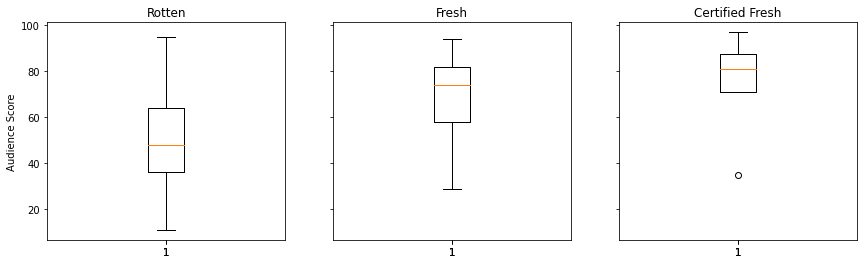

In [192]:
import matplotlib.pyplot as plt

thisData=data[[AUDIENCE_SCORE,CRITICS_RATING]].copy()   #create copy of data with just AUDIENCE_SCORE and CRITICS_SCORE columns
t3=thisData[1:]                                         # filter out unwanted column names

#just temporary place holders
Rotten=[]
Fresh=[]
CertFresh=[]

#loop through adding values into arrays for Rotten, Fresh, Certified Fresh
for index, row in t3.iterrows():
    if row[CRITICS_RATING] =="Rotten":
        Rotten.append(row["RT Audience Score"])

    if row[CRITICS_RATING] =="Fresh":
        Fresh.append(row["RT Audience Score"])

    if row[CRITICS_RATING]=="Certified Fresh":
        CertFresh.append(row["RT Audience Score"])

#find the five number summary for the data in Rotten array        
R_val=fiveNumSumMod2(Rotten)

#find the five number summary for the data in Fresh array
F_val=fiveNumSumMod2(Fresh)

#find the five number summary for the data in Certified Fresh Array
CF_val=fiveNumSumMod2(CertFresh)

#creat figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

#create Rotten box plot,
ax1.boxplot(R_val)
ax1.set_title('Rotten')

#create Fresh box plot
ax2.boxplot(F_val)
ax2.set_title('Fresh')

#create Certified Fresh box plot
ax3.boxplot(CF_val)
ax3.set_title('Certified Fresh')

#format the spacing between the plots
plt.subplots_adjust(right=2)

#set y axis label
ax1.set_ylabel("Audience Score")

#show the plots 
plt.show()


- Violin plot for `AUDIENCE_SCORE` grouped by `GENRE` showing only the top 5 genres

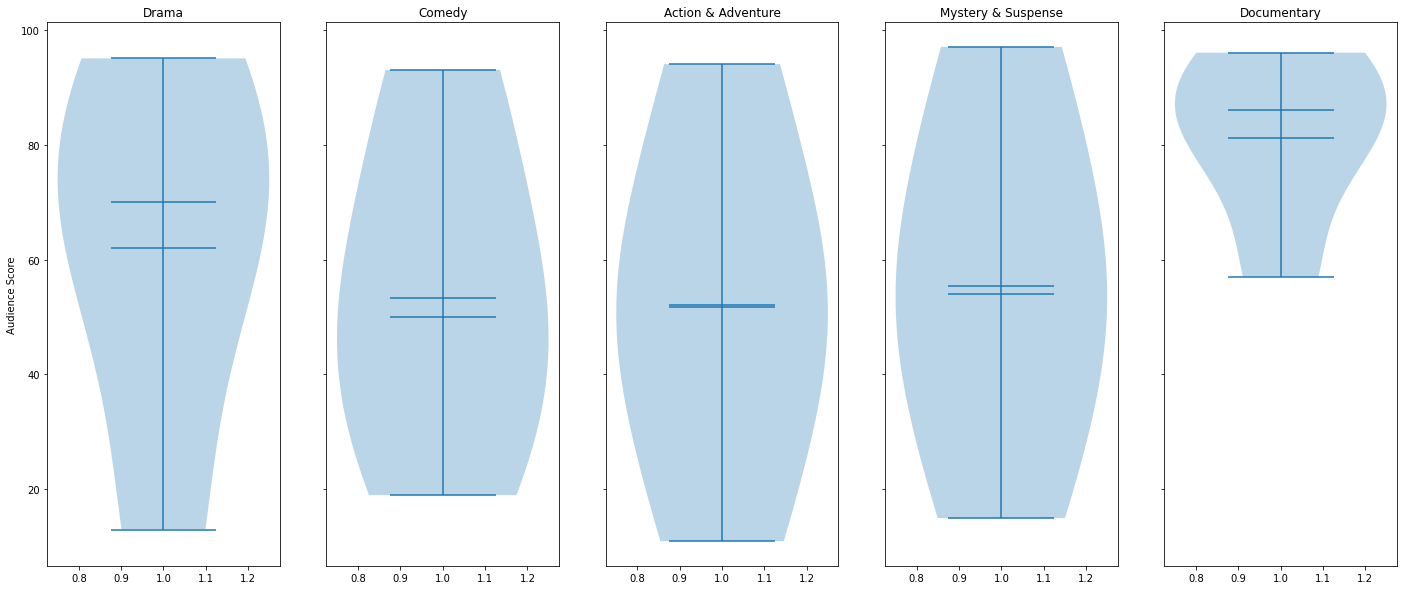

In [193]:
import matplotlib.pyplot as plt

thisData=data[[AUDIENCE_SCORE,GENRE]].copy()   #create copy of data with just AUDIENCE_SCORE and GENRE columns
t3=thisData[1:]                                # filter out unwanted column names

D_arr=[]
C_arr=[]
AA_arr=[]
MS_arr=[]
Doc_arr=[]

#loop through the top 5 Genres to find the total Audience Score for each genre
for index, row in t3.iterrows():
    if row["Genre"] =="Drama":
        D_arr.append(row["RT Audience Score"])

    if row["Genre"] =="Comedy":
        C_arr.append(row["RT Audience Score"])

    if row["Genre"]=="Action & Adventure":
        AA_arr.append(row["RT Audience Score"])

    if row["Genre"]=="Mystery & Suspense":
        MS_arr.append(row["RT Audience Score"])
    
    if row["Genre"]=="Documentary":
        Doc_arr.append(row["RT Audience Score"])


#convert arr of strings to integers, and return the 5 number summarys of each
D_val=fiveNumSumMod2(D_arr)

C_val=fiveNumSumMod2(C_arr)

AA_val=fiveNumSumMod2(AA_arr)

MS_val=fiveNumSumMod2(MS_arr)

Doc_val=fiveNumSumMod2(Doc_arr)


#create 5 subplots to be ploted
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True,figsize=(10,10))

#create Drama violin plot,
ax1.violinplot(D_val, showmedians=True,showmeans=True, showextrema=True)
ax1.set_title('Drama')

#create Comedy violin plot
ax2.violinplot(C_val, showmedians=True,showmeans=True, showextrema=True)
ax2.set_title('Comedy')

#create Action & Adventure violin plot
ax3.violinplot(AA_val, showmedians=True,showmeans=True, showextrema=True)
ax3.set_title('Action & Adventure')

#create Myster & Suspense violin plot
ax4.violinplot(MS_val, showmedians=True,showmeans=True, showextrema=True)
ax4.set_title('Mystery & Suspense')

#creat Documentary violin plot
ax5.violinplot(Doc_val, showmedians=True,showmeans=True, showextrema=True)
ax5.set_title('Documentary')

#format the spacing between the plots
plt.subplots_adjust(right=2)

#set y axis label
ax1.set_ylabel("Audience Score")

#show the plots 
plt.show()


- Overlapping density plot for `CRITICS_SCORE` grouped by `AUDIENCE_RATING`

In [203]:
print('this line should show Overlapping density plot for CRITICS_SCORE grouped by AUDIENCE_RATING')


this line should show Overlapping density plot for CRITICS_SCORE grouped by AUDIENCE_RATING


- Stacked bar chart to display the proportion of wins/nominations for the 5 `BEST*` variables

In [42]:
print('this line should show the proportion of wins/nominatiors for the 5 best_x variables')

this line should show the proportion of wins/nominatiors for the 5 best_x variables


- Scatterplot of `IMDB_RATING` vs `AUDIENCE_SCORE`

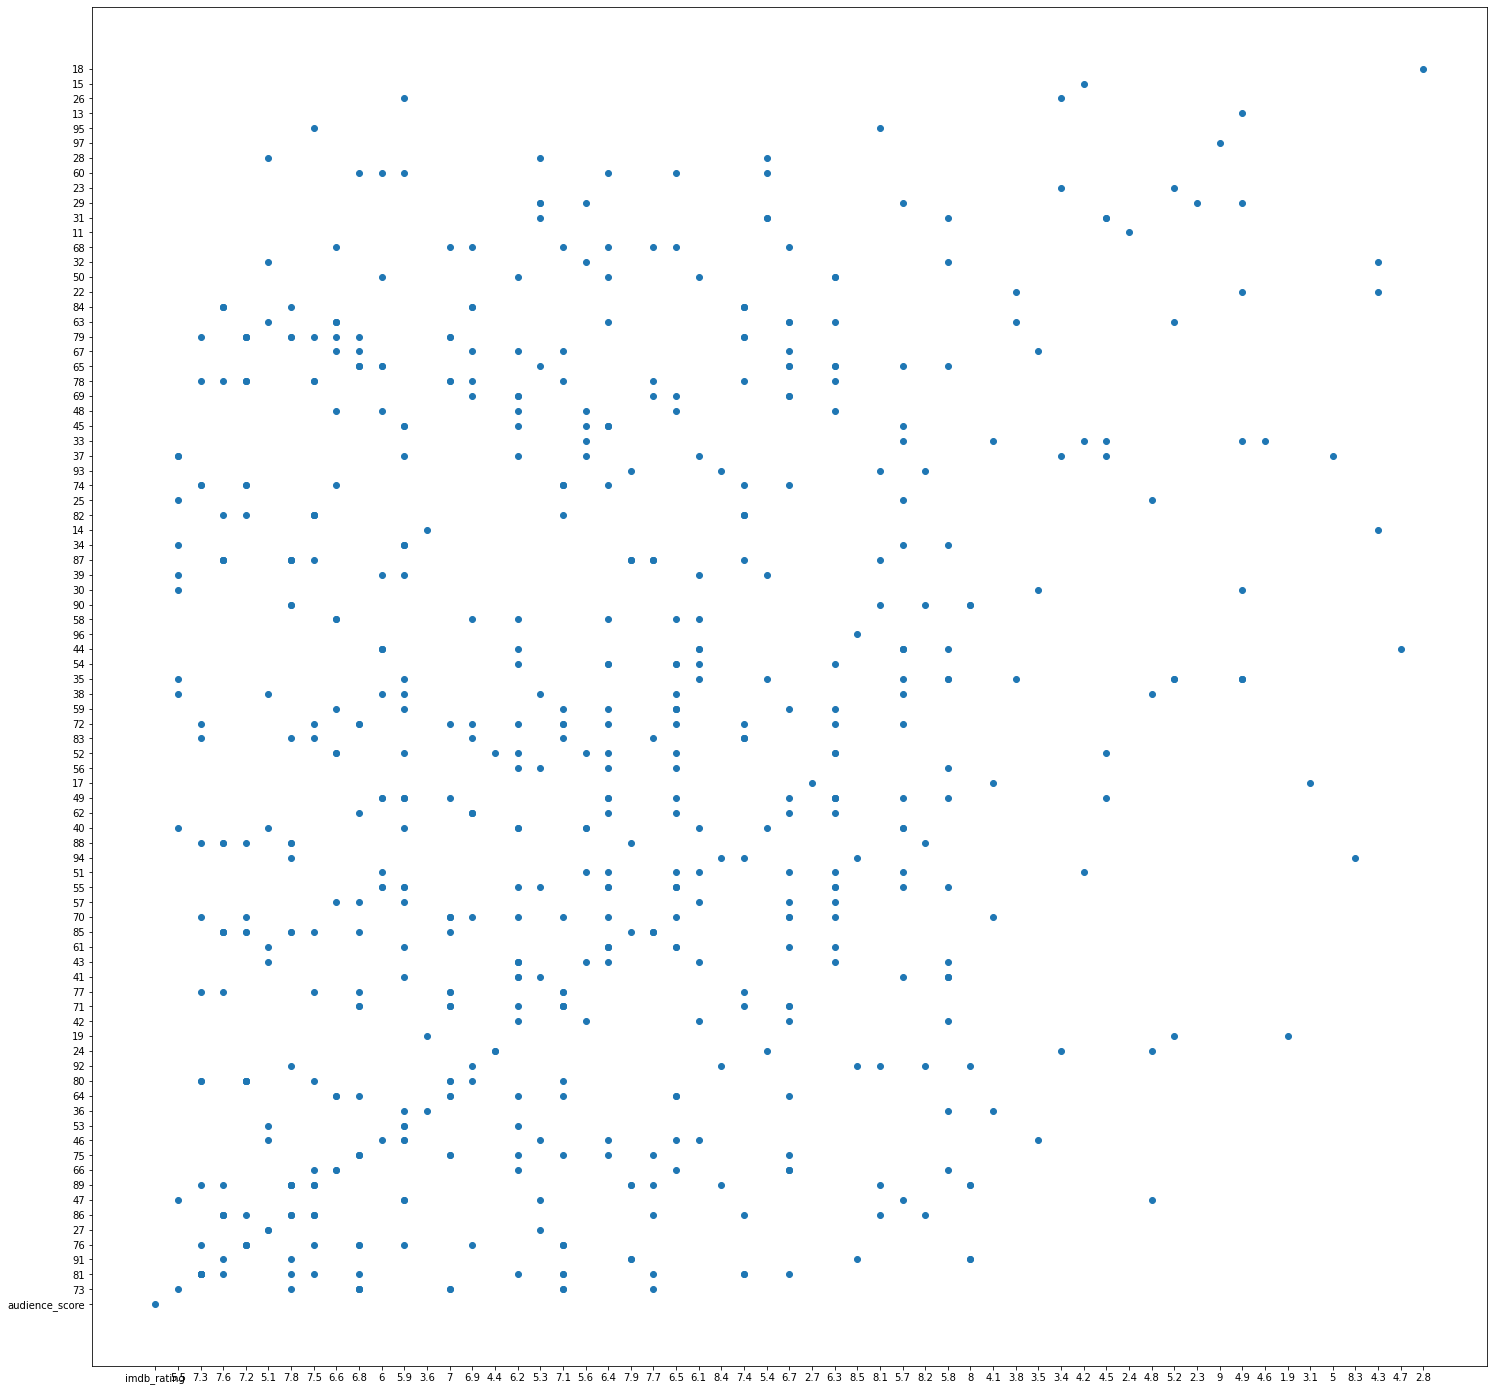

In [43]:
#print('this line should show the scatterplot of IMDB_RATING vs AUDIENCE_SCORE')
import matplotlib.pyplot as plt
newX = data[IMDB_RATING].copy()
newY= data[AUDIENCE_SCORE].copy()

plt.figure(figsize=(25,25))
plt.scatter(newX,newY)
plt.show()

- Small multiples (faceted) scatterplot of `IMDB_RATING` vs `AUDIENCE_SCORE` for each `MPAA_RATING`

In [44]:
print('this line should spit out Small multiples (faceted) scatterplot of IMDB_RATING vs AUDIENCE_SCORE for each MPAA_RATING')

this line should spit out Small multiples (faceted) scatterplot of IMDB_RATING vs AUDIENCE_SCORE for each MPAA_RATING


- Small multiples (faceted) scatterplot of `IMDB_RATING` vs `AUDIENCE_SCORE` for each `MPAA_RATING` colored with the top 3 genres

In [45]:
print('this line should spit out Small multiples (faceted) scatterplot of IMDB_RATING vs AUDIENCE_SCORE for each MPAA_RATING colored with the top 3 genres')

this line should spit out Small multiples (faceted) scatterplot of IMDB_RATING vs AUDIENCE_SCORE for each MPAA_RATING colored with the top 3 genres
